# Just Understanding Dataset

In [3]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
from PIL import Image

In [4]:
BASE_PATH = '/Users/armandbryan/Documents/challenges/Computer Vision Projects Expo 2024/datasets/DiaRetDB1 V2.1'
GROUND_PATH = '/Users/armandbryan/Documents/challenges/Computer Vision Projects Expo 2024/datasets/DiaRetDB1 V2.1/groundtruth/*.xml'
IMAGES_PATH = '/Users/armandbryan/Documents/challenges/Computer Vision Projects Expo 2024/datasets/DiaRetDB1 V2.1/images/*.png'

In [5]:
# Datasets
gt_paths = glob.glob(GROUND_PATH)
images_paths = glob.glob(IMAGES_PATH)

In [6]:
z = np.random.choice(gt_paths)
z

'/Users/armandbryan/Documents/challenges/Computer Vision Projects Expo 2024/datasets/DiaRetDB1 V2.1/groundtruth/diaretdb1_image048_02.xml'

In [1]:
def show_images():
    

SyntaxError: incomplete input (2203719656.py, line 2)

In [1]:
import cv2
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt

# Chemins des fichiers
image_path = "/Users/armandbryan/Documents/challenges/Computer Vision Projects Expo 2024/datasets/DiaRetDB1 V2.1/images/diaretdb1_image001.png"  # Remplacez par le chemin correct
xml_path = "/Users/armandbryan/Documents/challenges/Computer Vision Projects Expo 2024/datasets/DiaRetDB1 V2.1/groundtruth/diaretdb1_image001_04.xml"  # Chemin XML

# 1. Charger l'image
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Conversion pour matplotlib (BGR -> RGB)

# Charger l'image
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Conversion pour matplotlib

# Lire et parser le XML
tree = ET.parse(xml_path)
root = tree.getroot()

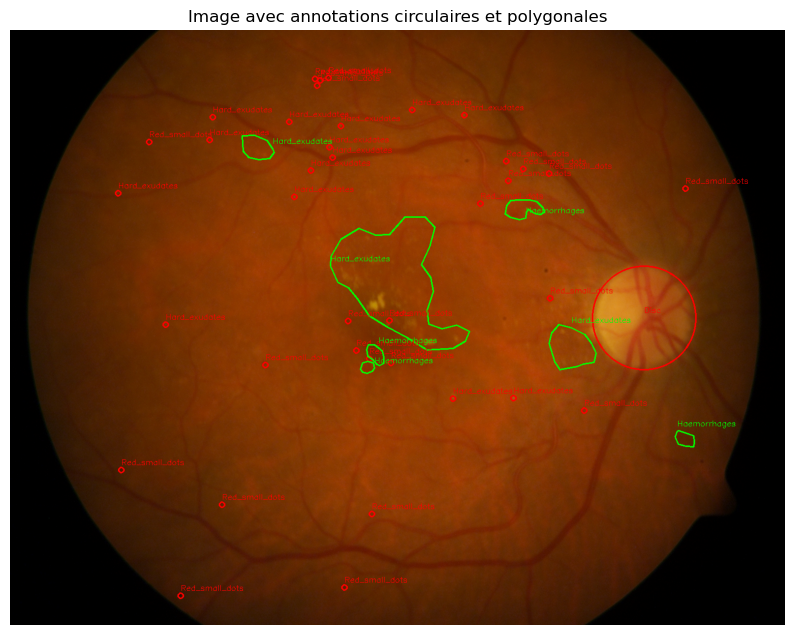

In [7]:


# Extraire les annotations (cercles et polygones)
for marking in root.find('markinglist').findall('marking'):
    # -----------------------------
    # 1. Traiter les régions circulaires
    # -----------------------------
    circleregion = marking.find('circleregion')
    if circleregion is not None:
        centroid_text = circleregion.find('centroid').find('coords2d').text
        x, y = map(int, centroid_text.split(','))
        radius = int(circleregion.find('radius').text)
        marking_type = marking.find('markingtype').text

        # Dessiner le cercle
        cv2.circle(image, (x, y), radius, color=(255, 0, 0), thickness=2)
        cv2.putText(image, marking_type, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)

    # -----------------------------
    # 2. Traiter les régions polygonales
    # -----------------------------
    polygonregion = marking.find('polygonregion')
    if polygonregion is not None:
        # Extraire les coordonnées du polygone
        coords = []
        for coord in polygonregion.findall('coords2d'):
            x, y = map(int, coord.text.split(','))
            coords.append([x, y])
        
        # Convertir les coordonnées en numpy array pour OpenCV
        pts = np.array(coords, dtype=np.int32)
        pts = pts.reshape((-1, 1, 2))  # Reshape pour cv2.polylines

        # Dessiner le polygone
        cv2.polylines(image, [pts], isClosed=True, color=(0, 255, 0), thickness=2)

        # Ajouter le type de marquage au premier point du polygone
        marking_type = marking.find('markingtype').text
        cv2.putText(image, marking_type, (coords[0][0], coords[0][1] - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

# Afficher l'image annotée
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
plt.title("Image avec annotations circulaires et polygonales")
plt.show()

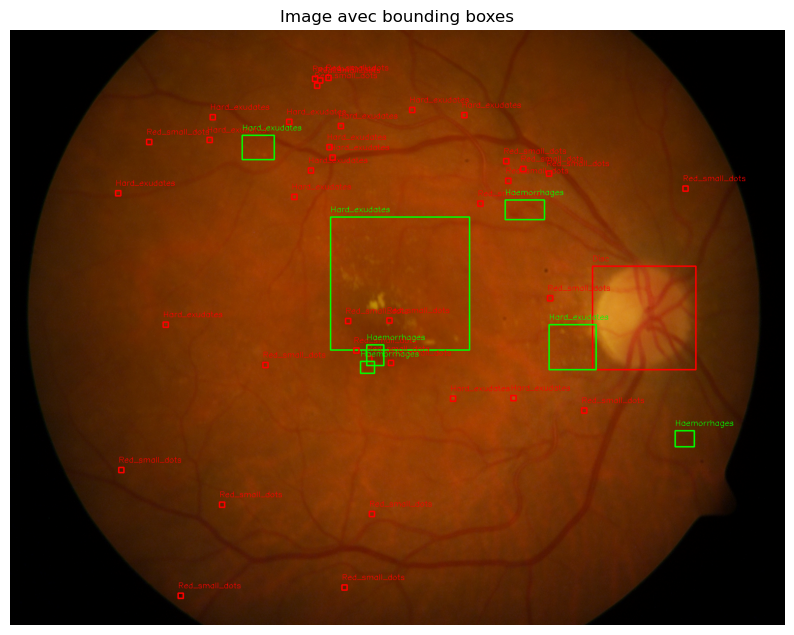

In [4]:
# Lire et parser le XML
tree = ET.parse(xml_path)
root = tree.getroot()

# Extraire les annotations (cercles et polygones)
for marking in root.find('markinglist').findall('marking'):
    # -----------------------------
    # 1. Traiter les régions circulaires
    # -----------------------------
    circleregion = marking.find('circleregion')
    if circleregion is not None:
        centroid_text = circleregion.find('centroid').find('coords2d').text
        x, y = map(int, centroid_text.split(','))
        radius = int(circleregion.find('radius').text)
        marking_type = marking.find('markingtype').text

        # Calculer les coordonnées de la bbox
        x_min = x - radius
        y_min = y - radius
        x_max = x + radius
        y_max = y + radius

        # Dessiner la bbox
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), color=(255, 0, 0), thickness=2)
        cv2.putText(image, marking_type, (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)

    # -----------------------------
    # 2. Traiter les régions polygonales
    # -----------------------------
    polygonregion = marking.find('polygonregion')
    if polygonregion is not None:
        # Extraire les coordonnées du polygone
        coords = []
        for coord in polygonregion.findall('coords2d'):
            x, y = map(int, coord.text.split(','))
            coords.append([x, y])
        
        # Calculer la bbox du polygone
        coords_np = np.array(coords)
        x_min, y_min = np.min(coords_np, axis=0)
        x_max, y_max = np.max(coords_np, axis=0)

        # Dessiner la bbox
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), color=(0, 255, 0), thickness=2)

        # Ajouter le type de marquage
        marking_type = marking.find('markingtype').text
        cv2.putText(image, marking_type, (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

# Afficher l'image annotée avec bounding boxes
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
plt.title("Image avec bounding boxes")
plt.show()

In [2]:
import numpy as np 
a = np.loadtxt("/Users/armandbryan/Documents/challenges/Computer Vision Projects Expo 2024/datasets/DiaRetDB1 V2.1/ddb1_v02_01_train_plain.txt", dtype = str)

In [10]:
a[0][1]

'groundtruth/diaretdb1_image001_01_plain.xml'

In [17]:
import glob
a = glob.glob('/Users/armandbryan/Documents/challenges/Computer Vision Projects Expo 2024/datasets/aptos2019-blindness-detection/train_images/*.png')
a[0]

'/Users/armandbryan/Documents/challenges/Computer Vision Projects Expo 2024/datasets/aptos2019-blindness-detection/train_images/46923eea9a4e.png'

In [18]:
import os

file_path = '/Users/armandbryan/Documents/challenges/Computer Vision Projects Expo 2024/datasets/aptos2019-blindness-detection/train_images/46923eea9a4e.png'

# Obtenir le nom de fichier sans extension
file_name = os.path.splitext(os.path.basename(file_path))[0]
print(file_name)

46923eea9a4e


In [20]:
!pip show transformers[flax]

zsh:1: no matches found: transformers[flax]


In [21]:
from transformers import FlaxConvNextForImageClassification, ConvNextImageProcessor


ImportError: cannot import name 'FlaxConvNextForImageClassification' from 'transformers' (/opt/anaconda3/lib/python3.12/site-packages/transformers/__init__.py)